# COGS 108 - Assignment 2: Data Exploration

# Important

**You must submit this file (`A2_DataExploration.ipynb`) to TritonED to finish the homework.**

**This assignment has more than 5 times as many questions as A1! Get started as early as possible.**

This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted assignment.

- This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!

Each coding question in this assignment only requires a small amount of code, about 1-3 lines. 

  - If you find yourself writing much more than that, you might want to reconsider your approach. 
  - Use the Tutorials notebooks as reference, as they often contain similar examples to those used in the assignment.

In [1]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

## Part 1 - Data Wrangling

For this assignment, you are provided with two data files that contain information on a sample of people. The two files and their columns are:

- `age_steps.csv`: Contains one row for each person.
    - `id`: Unique identifier for the person.
    - `age`: Age of the person.
    - `steps`: Number of steps the person took on average in January 2018.
    
    
- `incomes.json`: Contains one record for each person.
    - `id`: Unique identifier for the person. Two records with the same ID between `age_steps.csv` and `incomes.json` correspond to the same person.
    - `last_name`: Last name of the person.
    - `first_name`: First name of the person.
    - `income`: Income of the person in 2018.
    
For part 1 and 2 of the assignment, we recommend looking at the official 10 minutes to pandas guide: http://pandas.pydata.org/pandas-docs/stable/10min.html

**Question 1a:** Load the `age_steps.csv` file into a `pandas` DataFrame named `df_steps`. It should have 11850 rows and 3 columns.

In [3]:
df_steps = pd.DataFrame(pd.read_csv('age_steps.csv'))
# numpy = python list but better support for math
# pandas dataframe = 2d data
# df.loc is gonna come in real handy; you can slice out any rectangular piece of the dataset you want
# columns of pandas dataframe = series
# don't use a for-loop with numpy or pandas, or you'll potentially be lagging
# df.loc[df.loc[:, 'plate'] == arbitrary value]

In [4]:
df_steps

,id,age,steps
0,37475,46,5951
1,51201,36,10139
2,77330,50,-1
...,...,...,...
11847,39197,52,7580
11848,62557,49,6273
11849,77950,29,8888


In [5]:
# Tests for 1a

assert isinstance(df_steps, pd.DataFrame)
assert df_steps.shape == (11850, 3)


**Question 1b:** Load the `incomes.json` file into a `pandas` DataFrame called `df_income`. The DataFrame should have 13332 rows and 4 columns.

In [6]:
df_income = pd.DataFrame(pd.read_json('incomes.json'))

In [7]:
# Tests for 1b

assert isinstance(df_income, pd.DataFrame)
assert df_income.shape == (13332, 4)


In [8]:
df_income

,first_name,id,income,last_name
0,Brian,84764,99807.16,Wolfe
1,George,49337,0.00,Keith
2,Zachary,54204,5242.96,Wilcox
...,...,...,...,...
13329,Ian,68473,7617.27,Meyer
13330,Carl,60486,34479.99,Russell
13331,Curtis,13915,12133.79,Johnson


**Question 1c:** Drop the `first_name` and `last_name` columns from the `df_income` DataFrame. The resulting DataFrame should only have two columns.

In [9]:
df_income.drop(columns=['first_name', 'last_name'], inplace=True)

In [10]:
# Tests for 1c

assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns


**Question 1d:** Merge the `df_steps` and `df_income` DataFrames into a single combined DataFrame called `df`. Use the `id` column to match rows together.

The final DataFrame should have 10664 rows and 4 columns: `id`, `income`, `age`, and `steps`.

Call an appropriate `pandas` method to perform this operation; don't write a `for` loop. (In general, writing a `for` loop for a DataFrame will produce poor results.)

In [11]:
df = pd.merge(df_income, df_steps, how='inner', on='id')

In [12]:
df

,id,income,age,steps
0,84764,99807.16,41,8622
1,49337,0.00,31,9870
2,41693,0.00,37,-1
...,...,...,...,...
10661,68473,7617.27,40,7895
10662,60486,34479.99,49,6004
10663,13915,12133.79,39,7180


In [13]:
# Tests for 1d

assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])
assert df.shape == (10664, 4)


**Question 1e:** Reorder the columns of `df` so that they appear in the order: `id`, `age`, `steps`, then `income`.

In [14]:
df = df[['id', 'age', 'steps', 'income']]

In [15]:
df

,id,age,steps,income
0,84764,41,8622,99807.16
1,49337,31,9870,0.00
2,41693,37,-1,0.00
...,...,...,...,...
10661,68473,40,7895,7617.27
10662,60486,49,6004,34479.99
10663,13915,39,7180,12133.79


In [16]:
# Tests for 1e

assert list(df.columns) == ['id', 'age', 'steps', 'income']

**Question 1f:** You may have noticed something strange: the merged `df` DataFrame has fewer rows than either of `df_steps` and `df_income`. Why did this happen?

Please select the **one** correct explanation below and save your answer in the variable `q1f_answer`. For example, if you believe choice number 4 explains why `df` has fewer rows, set `q1f_answer = 4`.

1. Some steps were recorded inaccurately in `df_steps`.
2. Some incomes were recorded inaccurately in `df_income`.
3. There are fewer rows in `df_steps` than in `df_income`.
4. There are fewer columns in `df_steps` than in `df_income`.
5. Some `id` values were repeated in `df_steps` and in `df_income`.
6. Some `id` values in either `df_steps` and `df_income` were missing in the other DataFrame.

You may use the cell below to run whatever code you want to check the statements above. Just make sure to set `q1f_answer` once you've selected a choice.

In [17]:
q1f_answer = 1

In [18]:
# from IPython.core.display import HTML

# def multi_table(table_list):
#    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
#    '''
#     return HTML(
#         '<table><tr style="background-color:white;">' + 
#         ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
#         '</tr></table>'
#     )

In [19]:
# multi_table([df_steps, df_income, df])

In [20]:
# Tests for 1f

assert isinstance(q1f_answer, int)


## Part 2 - Data Cleaning

Before proceeding with analysis, we need to check our data for missing values.

There are many reasons data might contain missing values. Here are two common ones:

- **Nonresponse.** For example, people might have left a field blank when responding to a survey, or left the entire survey blank.
- **Lost in entry.** Data might have been lost after initial recording. For example, a disk cleanup might accidentally wipe older entries of a database.

In general, it is **not** appropriate to simply drop missing values from the dataset or pretend that if filled in they would not change your results. In 2016, many polls mistakenly predicted that Hillary Clinton would easily win the Presidential election by committing this error.

In this particular dataset, however, the **missing values occur completely at random**. This criteria allows us to drop missing values without significantly affecting our conclusions.

**Question 2a:** How values are missing in the `income` column of `df`? Save this number into a variable called `n_nan`.

In [21]:
n_nan = len(df.loc[pd.isnull(df['income']), ['income']])

In [22]:
n_nan

463

In [23]:
# Tests for 2a

assert(n_nan)


**Question 2b:** Remove all rows from `df` that have missing values.

In [24]:
# Remove all rows from df that have missing data. In other words, remove all rows with NaN values.

df = df.dropna()

In [25]:
# Tests for 2b

assert sum(np.isnan(df['income'])) == 0
assert df.shape == (10201, 4)


**Question 2c:** Note that we can now compute the average income. If your `df` variable contains the right values, `df['income'].mean()` should produce the value `25474.07`.

Suppose that we didn't drop the missing incomes. What will running `df['income'].mean()` output? Use the variable `q2c_answer` to record which of the below statements you think is true. As usual, you can use the cell below to run any code you'd like in order to help you answer this question as long as you set `q2c_answer` once you've finished.

1. No change; `df['income'].mean()` will ignore the missing values and output `25474.07`.
2. `df['income'].mean()` will produce an error.
3. `df['income'].mean()` will output `0`.
4. `df['income'].mean()` will output `nan` (not a number).
5. `df['income'].mean()` will fill in the missing values with the average income, then compute the average.
5. `df['income'].mean()` will fill in the missing values with `0`, then compute the average.

In [26]:
q2c_answer = 1

In [27]:
df['income'].mean()

25474.068990295098

In [28]:
# Tests for 2c

assert isinstance(q2c_answer, int)


**Question 2d:** Suppose that missing incomes did not occur at random, and that individuals with incomes below \$10000 a year are less likely to report their incomes. If so, one of the statements is true. Record your choice in the variable `q2d_answer`.

1. `df['income'].mean()` will likely output a value that is larger than the population's average income.
2. `df['income'].mean()` will likely output a value that is smaller than the population's average income.
3. `df['income'].mean()` will likely output a value that is the same as the population's average income
4. `df['income'].mean()` will raise an error.

In [29]:
q2d_answer = 1

In [30]:
# Tests for 2d

assert isinstance(q2d_answer, int)


## Part 3: Data Visualization

Although `pandas` only displays a few rows of a DataFrame at a time, we can use data visualizations to quickly determine the **distributions** of values within our data.

`pandas` comes with some plotting capabilities built-in. We suggest taking a look at https://pandas.pydata.org/pandas-docs/stable/visualization.html for examples. Here's one example:

Most plotting libraries in Python are built on top of a library called [Matplotlib](https://matplotlib.org/), including the plotting methods used in `pandas`. Although you won't need to know Matplotlib for this assignment, you will likely have to use it in future assignments and your final project, so keep the library in mind.

Notes:

- Everywhere that we ask you to create a plot, make sure to leave the `plt.gcf()` line at the end of the cell. Otherwise, you will lose points in the autograder.
- For all your histograms, use **25 bins**.

**Question 3a:** Plot a histogram of the `age` column with 25 bins.

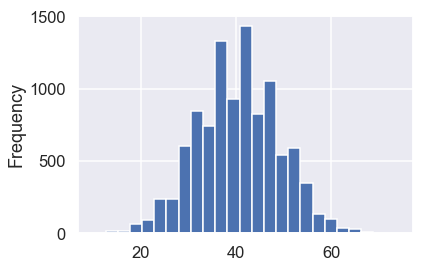

In [31]:
df['age'].plot.hist(bins=25)

f1 = plt.gcf()

In [32]:
# Tests for 3a

assert f1.gca().has_data()

# If you fail this test, you didn't use 25 bins for your histogram.
assert len(f1.gca().patches) == 25

**Question 3b:** Plot a histogram of the `steps` column with 25 bins.

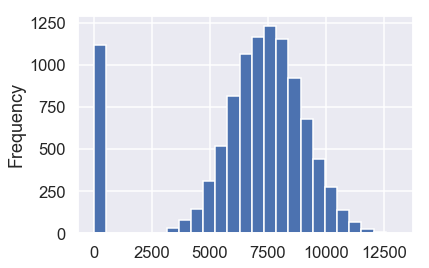

In [33]:
df['steps'].plot.hist(bins=25)

f2 = plt.gcf()

In [34]:
# Tests for 3b

assert f2.gca().has_data()

**Question 3c:** Plot a histogram of the `income` column with 25 bins.

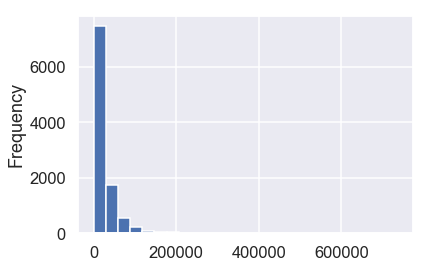

In [35]:
df['income'].plot.hist(bins=25)

f3 = plt.gcf()

In [36]:
# Tests for 3c

assert f3.gca().has_data()

**Question 3d:** Plot the data using the `pandas` `scatter_matrix` function. Only plot the `age`, `steps`, and `income` columns.

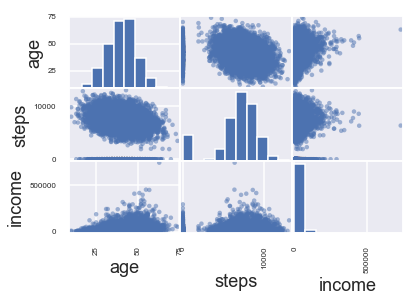

In [37]:
pd.plotting.scatter_matrix(df[['age', 'steps', 'income']])

f4 = plt.gcf()

In [38]:
# Tests for 3d

assert f4.gca().has_data()

## Part 4: Data Pre-Processing

In the above sections, we performed basic data cleaning and visualization. 

In practice, these two components of an analysis pipeline are often combined into an iterative approach. We go back and forth between looking at the data, checking for issues, and cleaning the data. 

Let's continue with an iterative procedure of data cleaning and visualization, addressing some issues that we notice after visualizing the data.

**Question 4a:** In the visualization of the `steps` column, we notice a large number of `-1` values. Count how many rows in `df` have `-1` in their `steps` column. Store the result in the variable `n_neg`.

In [39]:
n_neg = len(df.loc[df['steps'] < 0, ['steps']])

In [40]:
n_neg

1116

In [41]:
# Tests for 4a

assert(n_neg)
assert n_neg > 100


**Question 4b:** Since it's impossible to walk a negative number of steps, we will treat the negative values as missing data. Drop the rows with negative steps from `df`. Your answer should modify `df` itself.

In [42]:
df = df[df.steps >= 0]

In [43]:
df

,id,age,steps,income
0,84764,41,8622,99807.16
1,49337,31,9870,0.00
3,98170,34,6987,18077.78
...,...,...,...,...
10661,68473,40,7895,7617.27
10662,60486,49,6004,34479.99
10663,13915,39,7180,12133.79


In [44]:
# Tests for 4b

assert sum(df['steps'] == -1) == 0


You may have noticed that the values in `income` are not normally distributed which can hurt prediction ability in some scenarios. To address this, we will perform a log transformation on the `income` values.

First though, we will have to deal with any income values that are 0. Note that these values are not impossible values — they may, for example, represent people who are unemployed. 

**Question 4c:** Add a new column to `df` called `income10`. It should contain the same values as `income` with all `0` values replaced with `1`.

In [45]:
df['income10'] = df.income
df.loc[df['income10'] == 0, ['income10']] = 1

In [46]:
df

,id,age,steps,income,income10
0,84764,41,8622,99807.16,99807.16
1,49337,31,9870,0.00,1.00
3,98170,34,6987,18077.78,18077.78
...,...,...,...,...,...
10661,68473,40,7895,7617.27,7617.27
10662,60486,49,6004,34479.99,34479.99
10663,13915,39,7180,12133.79,12133.79


In [47]:
count = len(df.loc[df['income10'] == 0, ['income10']])
count

0

In [48]:
# Tests for 4c

assert list(df.columns) == ['id', 'age', 'steps', 'income', 'income10']
assert not any(df['income10'] == 0)


**Question 4d:** Now, transform the `income10` column using a log-base-10 transform. That is, replace each value in `income10` with the $ log_{10} $ of that value.

In [49]:
df['income10'] = np.log10(df['income10'])

In [50]:
df

,id,age,steps,income,income10
0,84764,41,8622,99807.16,5.00
1,49337,31,9870,0.00,0.00
3,98170,34,6987,18077.78,4.26
...,...,...,...,...,...
10661,68473,40,7895,7617.27,3.88
10662,60486,49,6004,34479.99,4.54
10663,13915,39,7180,12133.79,4.08


In [51]:
# Tests for 4d

assert np.isclose(min(df['income10']), 0.0, 0.001)
assert np.isclose(max(df['income10']), 5.867, 0.001)

**Question 4e:** Now, make a histogram for `income10` data after the data transformation. Again, use 25 bins.

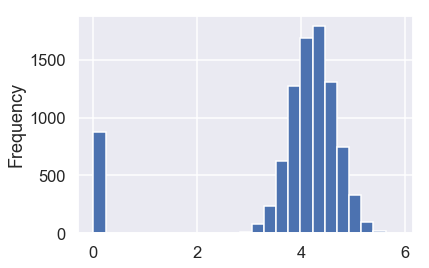

In [52]:
df['income10'].plot.hist(bins=25)

f4 = plt.gcf()

In [53]:
# Tests for 4e

assert f4.gca().has_data()

# If you fail this test, you didn't use 25 bins for your histogram.
assert len(f4.gca().patches) == 25

**Question 4f:** We might also have certain regulations or restrictions that we need to follow about the data. Here, we will only analyze adults. Remove all rows from `df` where age is less than 18.

In [54]:
age18 = len(df.loc[df['age'] < 18, ['age']])
age18

32

In [55]:
df = df[df.age >= 18]

In [56]:
df

,id,age,steps,income,income10
0,84764,41,8622,99807.16,5.00
1,49337,31,9870,0.00,0.00
3,98170,34,6987,18077.78,4.26
...,...,...,...,...,...
10661,68473,40,7895,7617.27,3.88
10662,60486,49,6004,34479.99,4.54
10663,13915,39,7180,12133.79,4.08


In [57]:
age18_2 = len(df.loc[df['age'] < 18, ['age']])
age18_2

0

In [58]:
# Tests for 4f

assert min(df['age']) >= 18


## Part 5 - Basic Analyses

Now that we have wrangled and cleaned our data, we can start doing some simple analyses. 

Here we will explore some basic descriptive summaries of our data, look into the inter-relations (correlations) between variables, and ask some simple questions about potentially interesting subsets of our data. 

**Question 5a:** Use the `describe` `pandas` method to check a descriptive summary of the data. Save the DataFrame generated by `describe` to a new variable called `desc`.

In [59]:
desc = df.describe()
desc

,id,age,steps,income,income10
count,9053.00,9053.00,9053.00,9053.00,9053.00
mean,49719.83,40.58,7508.20,25552.95,3.84
std,28818.58,8.49,1509.61,33466.50,1.31
...,...,...,...,...,...
50%,49611.00,41.00,7495.00,15604.93,4.19
75%,74817.00,46.00,8533.00,31464.73,4.50
max,99993.00,74.00,13093.00,736621.28,5.87


In [60]:
# Tests for 5a

assert isinstance(desc, pd.DataFrame)

**Question 5b:** Calculate the pairwise correlations between all variables.

Note: do this with a `pandas` method. Keep all columns (including ID). Assign the result (which should be a DataFrame) to a variable called `corrs`.

In [61]:
corrs = df.corr()
corrs

,id,age,steps,income,income10
id,1.00e+00,-4.54e-03,1.17e-03,-0.02,-8.22e-03
age,-4.54e-03,1.00e+00,-2.82e-01,0.27,1.03e-01
steps,1.17e-03,-2.82e-01,1.00e+00,0.05,2.49e-02
income,-2.44e-02,2.73e-01,4.74e-02,1.00,4.69e-01
income10,-8.22e-03,1.03e-01,2.49e-02,0.47,1.00e+00


In [62]:
# Tests for 5b

assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (5, 5)

**Question 5c:** Answer the following questions by setting your answer variables to either `'age'`, `'steps'`, or `'income'`.

- Which variable is most correlated with age (aside from `age` itself)? Record your answer in a variable called `age_corr`. 
- Which variable is most correlated with income (aside from `income` and `income10`)? Record your answer in a variable called `inc_corr`.

In [63]:
age_corr = 'income'
inc_corr = 'age'

In [64]:
# Tests for 5c

assert age_corr
assert inc_corr
assert age_corr in {'steps', 'age', 'income'}
assert inc_corr in {'steps', 'age', 'income'}


**Question 5d:** How many steps would you have to walk to be in the top 10% of walkers? Save your answer as a variable called `top_walker`.

Hint: check out the `quantile` method.

In [65]:
top_walker = df['steps'].quantile(q=0.1)
top_walker

5600.2

In [66]:
# Tests for 5d

assert top_walker
assert isinstance(top_walker, float)


**Question 5e:** What is the average income for people over the age of 45? Save your response in a variable called `old_income`.

Note: We're asking for the actual income, not the log-10 of income.

In [67]:
old_income = df.loc[df['age'] > 45, ['income']].mean().item()
old_income

37705.41171011064

In [68]:
# Tests for 5e
assert old_income
assert old_income > 5


# Part 6 - Predictions

A frequent goal of data analysis is to understand so that we can make predictions about future or unseen data points. 

Here we will explore some basic predictions, looking into whether we might be able to predict income from our other variables.

Note: You will use the `np.polyfit` function from NumPy as we did in [Tutorials/02-DataAnalysis](https://nbviewer.jupyter.org/github/COGS108/Tutorials/blob/master/02-DataAnalysis.ipynb).


**Question 6a:** Use polyfit to fit a 1-degree linear model, predicting income from age. Call the output parameters `a1` and `b1`.

In [69]:
a1, b1 = np.polyfit(df.age, df.income, deg=1)

In [70]:
df.age

0        41
1        31
3        34
         ..
10661    40
10662    49
10663    39
Name: age, Length: 9053, dtype: int64

In [71]:
# Tests for 6a

assert(a1)
assert(b1)

# If you fail these tests, your parameter values are quite far from what they
# should be.
assert abs(a1) > 100
assert abs(b1) > 100


**Question 6b:** Use the model parameters from 6a to predict the income of a 75-year-old. Call your prediction `pred_75`.

In [72]:
age_pred = 75
pred_75 = a1 * age_pred + b1
pred_75

62522.7632640715

In [73]:
# Tests for 6b

assert(pred_75)


**Question 6c:** Use polyfit once more to fit a 1-degree linear model, predicting income from steps. Call the output parameters `a2` and `b2`.

In [74]:
a2, b2 = np.polyfit(df.steps, df.income, deg=1)

In [75]:
# Tests for 6c

assert(a2)
assert(b2)

# If you fail these tests, your parameter values are quite far from what they
# should be.
assert abs(a2) < 100
assert abs(b2) > 100


**Question 6d:** Predict the income of someone who took 10,000 steps. Call your prediction `pred_10k`.

In [76]:
pred_steps = 10000

pred_10k = a2 * pred_steps + b2
pred_10k

28169.419739439454

In [77]:
# Test for 6d

assert(pred_10k)


**Question 6e:** To better understand a model, we can visualize its predictions. Use your first model to predict income from each integer age in between 18 and 80. Your predictions should be stored in a numpy array of floats called `pred_age`.

In [78]:
age_1880 = np.arange(18,81)
# age_1880
pred_age = a1 * age_1880 + b1
# pred_age

In [79]:
assert isinstance(pred_age, np.ndarray)
assert len(pred_age) == 63

# Your array should contain decimals, not integers
assert isinstance(pred_age[0], float)


**Question 6f:** Make a scatter plot with income on the y-axis and age on the x-axis. Then, draw your predictions as a red line on top of the scatter plot. Your plot should look like this:

![](income_steps_pred.png)

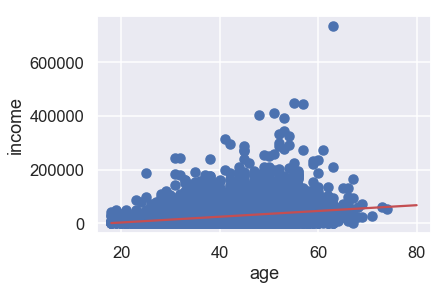

In [80]:
plt.scatter(x=df.age, y=df.income)
plt.plot([18, 80], [(a1 * 18) + b1, (a1 * 80) + b1], 'r')
plt.xlabel('age'); plt.xlim(15, 83); plt.ylabel('income')

f5 = plt.gcf()

In [81]:
assert f5.gca().has_data()

**Question 6g:** Now, let's do the same for the model that uses steps.

Use your second model to predict income from each multiple of 100 steps in between 2000 and 13000. Your predictions should be stored in a numpy array called `pred_steps`.

In [82]:
steps_2k13k = np.arange(start=2000, stop=13001, step=100)
# steps_2k13k
pred_steps = a2 * steps_2k13k + b2
# pred_steps

In [83]:
assert isinstance(pred_steps, np.ndarray)
assert len(pred_steps) == 111
# Your array should contain decimals, not integers
assert isinstance(pred_steps[0], float)


**Question 6h:** Make a scatter plot with income on the y-axis and steps on the x-axis. Then, draw your predictions as a red line on top of the scatter plot. Your plot should look like this:

![](income_age_pred.png)

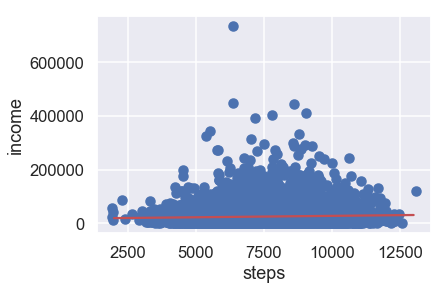

In [84]:
plt.scatter(x=df.steps, y=df.income)
plt.plot([2000, 13000], [(a2 * 2000) + b2, (a2 * 13000) + b2], 'r')
plt.xlabel('steps'); plt.ylabel('income')

f6 = plt.gcf()

In [85]:
assert f6.gca().has_data()

**Question 6i:** Notice that both these models perform poorly on this data. For this particular dataset, neither age nor steps seem to have a linear relationship with income. Nonetheless, fitting a linear model is simple and gives us a baseline to compare with more complex models in the future.

Suppose that you were forced to pick one of the above models. Between `'age'` and `'steps'`, which predictor has higher prediction power? Save your response in the variable `model_choice`.

In [86]:
model_choice = 'age'

In [87]:
assert model_choice
assert model_choice in {'age', 'steps'}


## Done! Upload this notebook to TritonED